<a href="https://colab.research.google.com/github/martatolos/eae-dsaa-2025/blob/main/3%20-%20SVM%20using%20Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Machines (SVMs) using Python

Goal of the session: At the end of this tutorial, you will understand the basics of SVM models and how to apply them using `scikit-learn`.

## SVM: Recap theory

**Describe in your own words: what is a support vector machine (SVM) and how does it work?**


<details>
  <summary>💡 Show solution</summary>

  <ul>
    <li>Set of supervised learning methods used for classification (and sometimes for regression and outliers detection).</li>
    <li>Core idea: It finds the best boundary (hyperplane) that separates data points of different classes with the maximum margin.</li>
    <li>Margin: The distance between the hyperplane and the nearest data points of each class. SVM tries to maximize this margin for better generalization.</li>
    <li>Works linearly in basic form but can handle non-linear separation using the kernel trick (e.g., RBF, polynomial kernels) to project data into higher dimensions.</li>
 </ul>



</details>


### Pros and Cons

**Strengths of SVMs:**
- Effective in high-dimensional spaces (i.e., with many features, like text data) - even effective approach even if the number of features is (much) larger than the number of samples
- Memory efficient - uses only a subset of training data (support vectors).
- Non-linearity - can handle non-linear separation using the kernel trick (e.g., RBF, polynomial kernels) to project data into higher dimensions.
- Versatile - can be used with different kernel functions for linear and non-linear classification
- Robust to overfitting - especially in high-dimensional settings with proper regularization

**Weaknesses of SVMs**
- Not suitable for large datasets - training time and memory usage scale poorly with number of samples.
- Performance drops with noisy data and overlapping classes.
- Limited interpretability - unlike decision trees or linear models, SVMs can be hard to explain.
- No direct probability estimates - requires extra calibration if probabilities are needed.
- Hard to tune — choosing the right kernel and hyperparameters (C, gamma) can be tricky.

## SVMs in Python using scikit-learn

### Prerequisite

Before we begin, we have to install the necessary python packages

In [103]:
%pip install numpy==2.0.2 pandas==2.2.2 scikit-learn==1.6.1 seaborn==0.13.2


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip3.12 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [105]:
# Run general imports
import pandas as pd
from IPython.display import display


### Reading iris dataset

For illustrating SVMs in `scikit-learn` we leverage the iris dataset from last week's tutorial.

In [106]:
import sklearn.datasets as datasets

# Load the data
iris = datasets.load_iris()

# We define a Dataframe (tabular structure) with the predictor variables
# and on the other hand a separated vector with the response variable
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target # Target variable

display(iris_df)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Let's visualize the features of the dataset again:

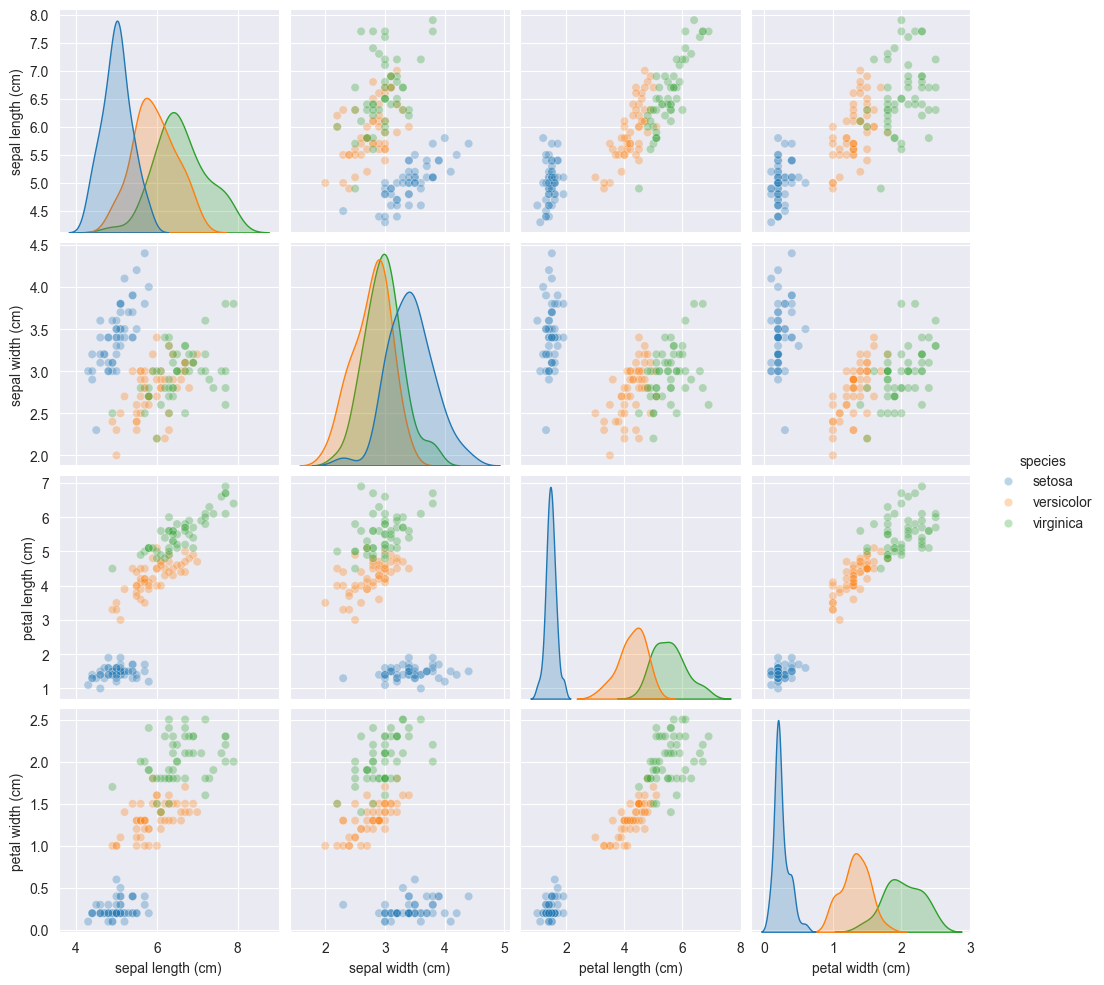

In [107]:
import seaborn as sns

# For the purpose of plotting the graphic we make a copy of the data frame
# and add our target column for better visualization
df_label = iris_df.copy()
species_dict = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
df_label['species'] = pd.Series(y).map(species_dict)

sns.pairplot(
    df_label,
    hue='species', # Color data points differently based on their value in column  "species"
    plot_kws=dict(alpha=0.3) # Transparency prevents under-representation of overlapping points
)

### Building train test split

In [108]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris_df, y, test_size=0.3, random_state=70, stratify=y)

# Python f-strings
print(f"Train dataset size {len(X_train)} / test dataset size {len(X_test)}")

Train dataset size 105 / test dataset size 45


### SVM implementations in scikit-learn

The `scikit-learn` library offers multiple implementations for SVMs (in package `sklearn.svm`) focused on different use-cases and scenarios:

| Class       | Task           | Kernel Support     | Scales Well? |
| ----------- | -------------- | ------------------ | ------------ |
| `SVC`       | Classification | Yes (nonlinear OK) | ❌ Medium     |
| `NuSVC`     | Classification | Yes                | ❌ Medium     |
| `LinearSVC` | Classification | Only Linear        | ✅ Large      |
| `SVR`       | Regression     | Yes                | ❌ Medium     |
| `NuSVR`     | Regression     | Yes                | ❌ Medium     |
| `LinearSVR` | Regression     | Only Linear        | ✅ Large      |

In our tutorial today, we'll focus on the following two implementations:

1. `sklearn.svm.SVC` — Support Vector Classification
- Standard SVM for classification tasks.
- Supports linear, polynomial, RBF, and sigmoid kernels.
- Can use the kernel trick.
- Suitable for small to medium datasets.

2. `sklearn.svm.LinearSVC`: Linear Support Vector Classification
- Optimized for large datasets with a linear kernel only.
- Much faster than `SVC(kernel="linear")`.
- However - does not support the kernel trick.

Please refer to the [documentation page](https://scikit-learn.org/stable/modules/svm.html) for more details.

### SVM training

Let's train a first SVM on the iris dataset

In [109]:
from sklearn import svm

# Linear SVM classifier
clf_svm = svm.SVC(kernel="linear")
clf_svm.fit(X_train, y_train)
clf_svm

SVC(kernel='linear')

Check the performance of the trained model

In [110]:
from sklearn.metrics import accuracy_score

# 1. Check the overall accuracy of the model on the validation set
y_pred = clf_svm.predict(X_test)
accuracy_score(y_test, y_pred)

0.9777777777777777

In [111]:
from sklearn.metrics import classification_report

# 2. Check the performance per class
report = classification_report(y_test, y_pred, target_names=['setosa', 'versicolor', 'virginica'])
print(report)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.93      0.97        15
   virginica       0.94      1.00      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [112]:
from sklearn.metrics import confusion_matrix

# 3. Check the confusion matrix to better understand the errors
svm_conf_mat = confusion_matrix(y_test, y_pred)
svm_conf_mat

array([[15,  0,  0],
       [ 0, 14,  1],
       [ 0,  0, 15]])

### Hyperparameters

The `SVC` has three important hyperparameters:

1. `C` (default=`1.0`)
- Controls the trade-off between a smooth decision boundary and classifying training points correctly
- Low C → smoother boundary, more regularization (however might underfit)
- High C → less regularization, fits training data more tightly (risk of overfitting)

2. `kernel` (default=`rbf`)
- Specifies the type of kernel used to transform the data:
- `linear` – linear decision boundary
- `poly` – polynomial kernel
- `rbf` – radial basis function (Gaussian), usually a good default

3. `gamma` (default=`scale`)
- Controls how far the influence of a single training example reaches.
- Only available when using 'rbf', 'poly', 'sigmoid' kernel
- Can be `scale`, `auto` or a fixed number
- `auto`: 1 / n_features
- `scale`: 1 / (n_features * Var(X))
- Low gamma → ‘far’ influence, smoother boundaries.
- High gamma → ‘close’ influence, tighter fit, potential overfitting.

In [113]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=71, stratify=y_train)

# Python f-strings
print(f"Train dataset size {len(X_train)} / val dataset size {len(X_val)}")

Train dataset size 73 / val dataset size 32


In [114]:
# Train an SVM classifier with RBF kernel
clf_svm_rbf = svm.SVC(kernel="rbf", C=1.0, gamma=0.1)
clf_svm_rbf.fit(X_train, y_train)
clf_svm_rbf

SVC(gamma=0.1)

In [115]:
# Predict on test set
y_pred = clf_svm_rbf.predict(X_val)
accuracy_score(y_val, y_pred)

0.96875

**Exercise: Investigate the influence of different kernels and hyper-parameters settings on the performance**

In [116]:
# Add your code here ...

# 1. Define hyperparameters and instantiate a SVM

# 2. Train a SVM classifier on the training data set

# 3. Validate the performance on the validation set









### Hyperparameter optimization

`sklearn` offers utilities to run hyperparameter optimization using (for example) `GridSearchCV` or `RandomizedSearchCV`.



In [117]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameter values we want to explore
parameter_values = {
    "C": [0.1, 1, 10, 100],
    "gamma": [0.001, 0.01, 0.1, 1],
    "kernel": ["linear", "rbf"]
}

# Instantiate grid search util
grid_search = GridSearchCV(
    estimator=SVC(), # Classifier to be optimized
    param_grid=parameter_values, # Parameter values to explore
    cv=5,  # Number of cross-validations to be performed
    scoring="accuracy", # Scoring function to rate the different parameter combinations
    n_jobs=-1 # Number of parallel execution
)

# Run grid search
grid_search.fit(X_train, y_train)

# Show best results
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

Best parameters: {'C': 0.1, 'gamma': 0.001, 'kernel': 'linear'}
Best cross-validation accuracy: 0.9866666666666667


In [ ]:
# Use the best classifier to predict target on new instance
y_pred = grid_search.predict(X_val)
accuracy_score(y_val, y_pred)

In [ ]:
# We can also access the best model directly
grid_search.best_estimator_

In [118]:
# Get the complete result overview of all configurations
results = pd.DataFrame(grid_search.cv_results_)
display(results)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001360,0.000185,0.001522,0.001586,0.1,0.001,linear,"{'C': 0.1, 'gamma': 0.001, 'kernel': 'linear'}",1.000000,1.000000,0.933333,1.000000,1.000000,0.986667,0.026667,1
1,0.001308,0.000113,0.000816,0.000099,0.1,0.001,rbf,"{'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}",0.333333,0.333333,0.333333,0.642857,0.642857,0.457143,0.151635,31
2,0.001343,0.001095,0.000649,0.000120,0.1,0.010,linear,"{'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}",1.000000,1.000000,0.933333,1.000000,1.000000,0.986667,0.026667,1
3,0.000808,0.000107,0.000611,0.000038,0.1,0.010,rbf,"{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}",0.333333,0.333333,0.333333,0.642857,0.642857,0.457143,0.151635,31
4,0.000811,0.000109,0.000605,0.000035,0.1,0.100,linear,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}",1.000000,1.000000,0.933333,1.000000,1.000000,0.986667,0.026667,1
5,0.000886,0.000077,0.000618,0.000023,0.1,0.100,rbf,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}",1.000000,0.866667,0.933333,0.714286,0.785714,0.860000,0.101758,29
6,0.000817,0.000133,0.000570,0.000038,0.1,1.000,linear,"{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}",1.000000,1.000000,0.933333,1.000000,1.000000,0.986667,0.026667,1
7,0.001076,0.000478,0.000631,0.000076,0.1,1.000,rbf,"{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}",1.000000,1.000000,0.933333,1.000000,0.928571,0.972381,0.033860,17
8,0.000886,0.000082,0.000766,0.000271,1.0,0.001,linear,"{'C': 1, 'gamma': 0.001, 'kernel': 'linear'}",1.000000,1.000000,0.933333,1.000000,1.000000,0.986667,0.026667,1
9,0.000752,0.000079,0.000534,0.000029,1.0,0.001,rbf,"{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}",0.400000,0.333333,0.400000,0.642857,0.642857,0.483810,0.132124,30


In [ ]:
# Sort the result by test score (rank)
display(results.sort_values("rank_test_score"))

### Visualize the decision boundaries

For illustration purposes, we will reload the data and take only the first two features of the iris data set:

In [149]:
import matplotlib.pyplot as plt

# Reload data set
iris = datasets.load_iris()
X = pd.DataFrame(iris.data[:, :2], columns=[iris.feature_names[0], iris.feature_names[1]]) # first 2 features
y = iris.target

In [150]:
display(X)

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


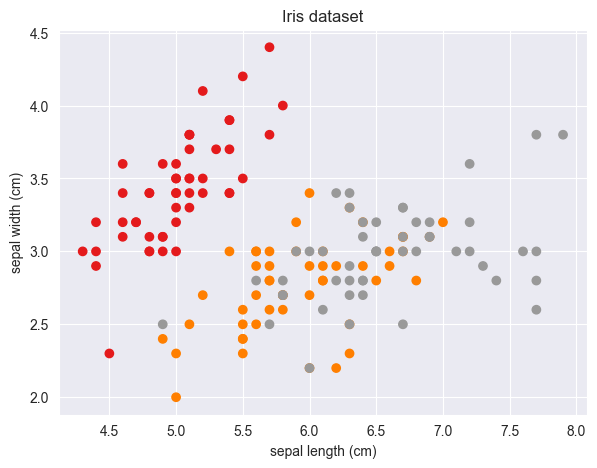

In [152]:
# Plot a figure highlight the data points and their classes
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.scatter(x=X[iris.feature_names[0]], y=X[iris.feature_names[1]], c=y, cmap=plt.cm.Set1) # Parameter c controls the highlight
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("Iris dataset")
plt.show()

Re-train an SVM model based only on the two features selected

In [153]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

# Train the model using a linear kernel
svc_clf = svm.SVC(kernel='linear', C=1, gamma=1) # C and gamma are hyper-parameters
svc_clf.fit(X_train, y_train)

SVC(C=1, gamma=1, kernel='linear')

Now let's plot the decision boundary for the linear classifier

[]

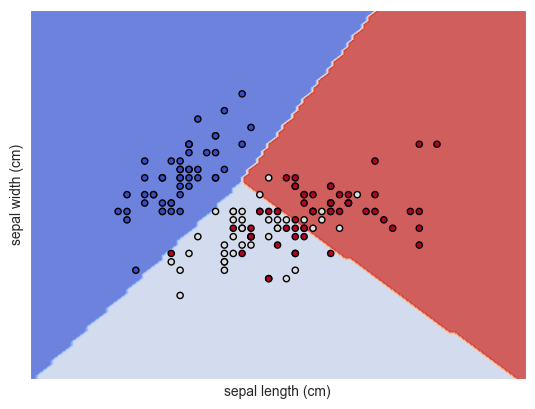

In [154]:
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay

# Create a figure using matplot lib
fig, ax = plt.subplots()

# Use a utility class from scikit-learn to print the decision boundaries
disp = DecisionBoundaryDisplay.from_estimator(
    svc_clf,
    X,
    response_method="predict",
    cmap=plt.cm.coolwarm,
    alpha=0.8,
    ax=ax,
    xlabel=iris.feature_names[0],
    ylabel=iris.feature_names[1],
)

# Plot the data points
ax.scatter(X[iris.feature_names[0]], X[iris.feature_names[1]], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
ax.set_xticks(())
ax.set_yticks(())

Now let's compare different models together

In [155]:
# Define the models that we want to inspect and their configurations
models = [
    svm.SVC(kernel="linear", C=1),
    svm.LinearSVC(C=1, max_iter=10000),
    svm.SVC(kernel="rbf", gamma=0.7, C=1),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=1),
]

# Fit all the models
models = [clf.fit(X_train, y_train) for clf in models]
models

[SVC(C=1, kernel='linear'),
 LinearSVC(C=1, max_iter=10000),
 SVC(C=1, gamma=0.7),
 SVC(C=1, gamma='auto', kernel='poly')]

Now let's compare their decision boundaries graphically

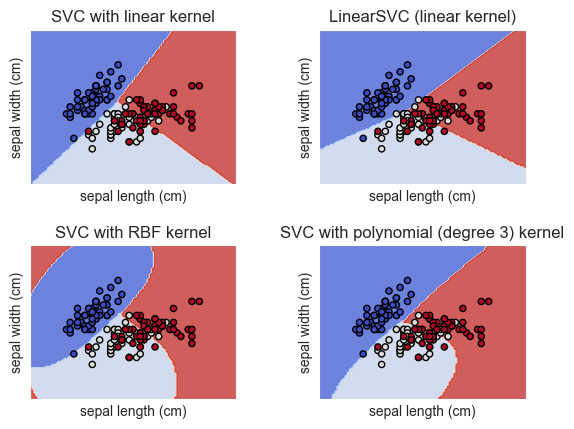

In [157]:
from sklearn.inspection import DecisionBoundaryDisplay

# Titles for the plots
titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

for clf, title, ax in zip(models, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
    )
    ax.scatter(X[iris.feature_names[0]], X[iris.feature_names[1]], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

**Exercise: Investigate the changes in the decision boundary if changing hyperparameters**

### Implementation hints

**Feature scaling**

The input features of an SVM should always be scaled as SVMs are distance-based models, i.e, they rely heavily on dot products and Euclidean distances (especially when using kernels).

- If features are on different scales, one can dominate the others, leading to poor decision boundaries.
- Unscaled features distort the kernel: The RBF kernel is sensitive to feature magnitude. Large-scale features can skew similarity calculations.
- Optimization becomes harder: Feature imbalance can lead to slow convergence or convergence failure in the underlying solver.

In [136]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Define the processing pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(kernel='linear'))
])

# Train the classifier using the pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC(kernel='linear'))])

In [139]:
# Nothing changes for the predict method
y_pred = pipeline.predict(X_test)
accuracy_score(y_test, y_pred)

0.74

Pipelines can also be used when performing grid search for the best hyperparameters.

In [142]:
# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC())
])

# For the parameter specification we have to put the name of the component
# before the parameter name (e.g., svc__C for parameter 'C' of component 'svc')
param_grid = {
    'svc__C': [0.1, 1, 10, 100],
    'svc__gamma': [0.001, 0.01, 0.1, 1],
    'svc__kernel': ['rbf']
}

# ... the remainder of the code stays the same
grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

grid.predict(X_test)
accuracy_score(y_test, y_pred)

0.74

### Exercise: classify hand writings

In this exercise, we'll use the MNIST dataset,  a classic benchmark dataset in machine learning and computer vision. It contains:

- 70,000 grayscale images of handwritten digits (0 to 9)
- Each image is 8x8 / 28×28 pixels
- Labels correspond to the digit shown in the image

In [11]:
# Load MNIST dataset (this is actually the 8x8 version; for full 28x28 see below)
import sklearn.datasets as datasets

size = 8
digits = datasets.load_digits()
X, y = digits.data, digits.target

# ------------------
#from sklearn.datasets import fetch_openml
#size = 28
#digits = fetch_openml('mnist_784', version=1, as_frame=False)
#X, y = digits.data / 255.0, digits.target.astype(int)

# We only use 2.5k of the points (otherwise training will take too long)
#X = X[:2500]
#y = y[:2500]

In [13]:
# Let's look at our features
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [14]:
# ... and target
y

array([0, 1, 2, ..., 8, 9, 8])

The feature values are difficult to interpret. Let's visualize the numbers instead:

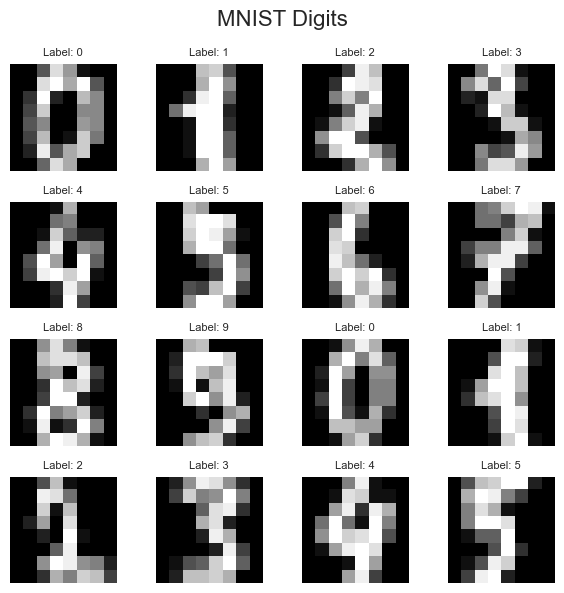

In [15]:
from matplotlib import pyplot as plt

# Number of images to display
num_images = 16
rows, cols = 4, 4  # 4x4 grid

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(6, 6))
fig.suptitle("MNIST Digits", fontsize=16)

for i in range(num_images):
    ax = axes[i // cols, i % cols]
    ax.imshow(X[i].reshape(size, size), cmap='gray')
    ax.set_title(f"Label: {y[i]}", fontsize=8)
    ax.axis('off')

plt.tight_layout()
plt.show()

**Now it's your turn:**
- Split the data into a train, validation and test set
- Train a classifier of your choice (e.g. decision tree, logistic regression, SVM)
- Evaluate the performance of the classifier
- Analyze the prediction results

In [ ]:
# You code here ...